## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

columnsX = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = pd.DataFrame(data, columns=columnsX)
y = pd.DataFrame(target, columns=['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
rt1 = DecisionTreeRegressor(max_depth=8)

In [6]:
rt1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [7]:
path = rt1.cost_complexity_pruning_path(X_train, y_train)
print(path)

{'ccp_alphas': array([0.00000000e+00, 3.83955547e-14, 1.31926121e-05, 3.95778364e-05,
       5.27704485e-05, 1.18733509e-04, 1.18733509e-04, 2.81442392e-04,
       4.74934037e-04, 4.74934037e-04, 4.74934037e-04, 6.33245383e-04,
       6.46437995e-04, 6.46437995e-04, 1.06860158e-03, 1.31926121e-03,
       1.59630607e-03, 1.59630607e-03, 2.32629727e-03, 2.74846086e-03,
       3.03957784e-03, 3.44766931e-03, 3.49076517e-03, 3.87862797e-03,
       4.22603342e-03, 5.38698329e-03, 5.71899736e-03, 6.38522427e-03,
       8.02697156e-03, 9.22741550e-03, 9.30518909e-03, 9.39343301e-03,
       9.52506596e-03, 9.57783641e-03, 9.87027265e-03, 1.22462621e-02,
       1.28232190e-02, 1.37906772e-02, 1.47059932e-02, 1.51978892e-02,
       1.61609499e-02, 1.63632366e-02, 1.69041337e-02, 1.75745697e-02,
       1.98006973e-02, 2.00294007e-02, 2.02482917e-02, 2.06882146e-02,
       2.18921975e-02, 2.33267370e-02, 2.37818821e-02, 2.42414248e-02,
       2.47689408e-02, 2.49246136e-02, 2.75813544e-02, 3.33774

Text(0, 0.5, 'impurities')

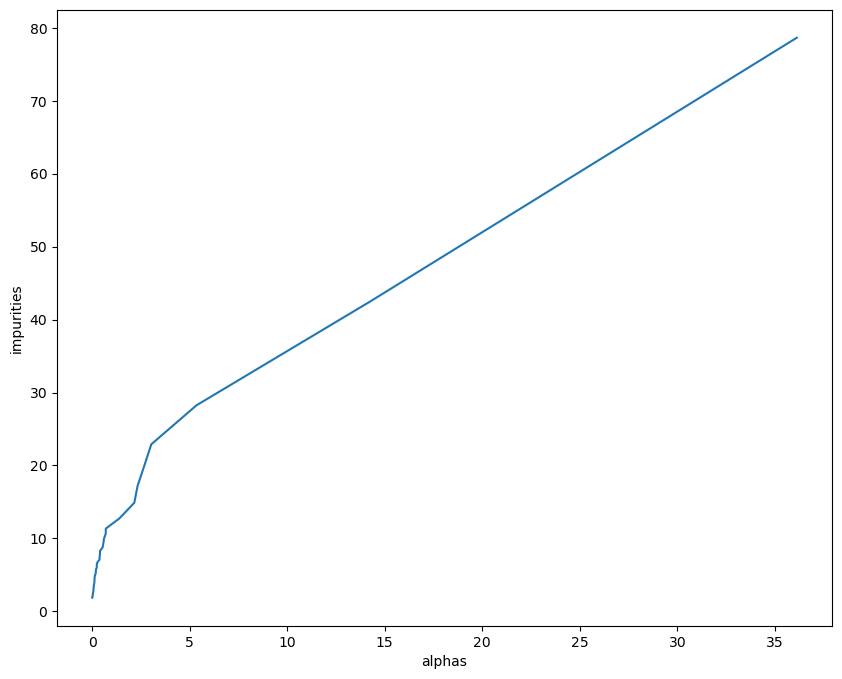

In [8]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,8))
plt.plot(ccp_alphas, impurities)
plt.xlabel('alphas')
plt.ylabel('impurities')

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
dtrs = []

for alpha in ccp_alphas:
    dtr = DecisionTreeRegressor(ccp_alpha=alpha)
    dtr.fit(X_train, y_train)
    dtrs.append(dtr)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [10]:
mse_train = [mean_squared_error(y_train, dtr.predict(X_train)) for dtr in dtrs]
mse_test = [mean_squared_error(y_test, dtr.predict(X_test)) for dtr in dtrs]

print('mse das arvores de treino:', mse_train)
print('\nmse das avores de teste:', mse_test)

mse das arvores de treino: [0.0, 0.0, 0.00019788918205804613, 0.00039357959542656056, 0.0004859278803869845, 0.0027066842568161864, 0.002587950747581357, 0.0065294635004397574, 0.01327836411609499, 0.013753298153034301, 0.014703166226912933, 0.01803712777987184, 0.0199500565397663, 0.02512156049754995, 0.036569669556476954, 0.047097374041965095, 0.05943906269631865, 0.06742059303932657, 0.08749403191355697, 0.10008335332213958, 0.12351035420164705, 0.1368409233686278, 0.143821134450422, 0.16232817051022852, 0.18268217226924344, 0.22050099372922582, 0.24288917063587237, 0.2667326183051775, 0.3305530217363989, 0.37320796163672143, 0.39180294844410923, 0.4199281316748334, 0.429453197637894, 0.46774015694068455, 0.48722784383602313, 0.5647825617654113, 0.6269842830871852, 0.6807799860649463, 0.709149599081657, 0.7390534814789432, 0.7552144313470169, 0.7715776679345279, 0.8051242818307459, 0.8570860137370689, 0.9315891967165052, 0.9513898940402896, 0.9714192947187666, 1.0123558010444553, 1.

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

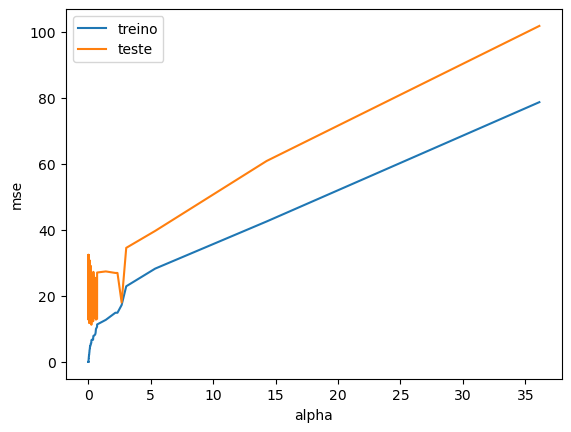

In [11]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas, mse_train, label="treino")
ax.plot(ccp_alphas, mse_test, label="teste")
ax.set_xlabel("alpha")
ax.set_ylabel("mse")
ax.legend()
plt.show()

In [12]:
min(mse_train)

0.0

In [13]:
mse_train.index(min(mse_train))

0

In [14]:
ccp_alphas[0]

0.0

In [15]:
rt2 = DecisionTreeRegressor(max_depth=8, ccp_alpha=0)

In [16]:
rt2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=8)

In [17]:
y_pred = rt2.predict(X_test)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [18]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7011888821471379


### 7. Visualize esta árvore.

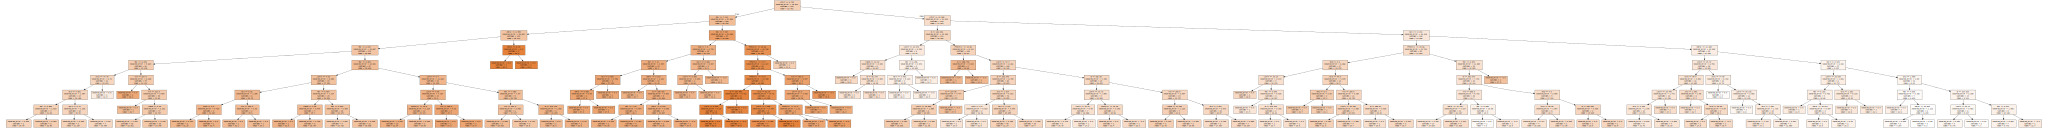

In [19]:
dot_data = tree.export_graphviz(rt2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph